# **파이썬 딥러닝 텐서플로 142p~181p**

## **01. 합성곱 신경망**
- Convolutional Neural Network
- 이미지 분류, 객체 탐지, 스타일 전이 등에서 이용
- 객체 탐지: 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술  
  

1-1. 이미지 표현
- 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현(완전 검은색: 0, 완전 흰색: 255)
- 컬러 이미지는 R,G,B 3장의 이미지를 겹쳐 표현(숫자가 클수록 해당 색상 더 강하게 표현)  
  
1-2. 합성곱
- 입력 이미지에 대해 일반적으로 정방형 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
- 특성맵: 합성곱 연산을 통해 추출된 이미지  

1-3. 채널
- 입력 이미지를 구성하는 2차원 배열의 개수

1-4. 스트라이드
- 이동하는 간격
- 보통 1 또는 2로 설정

1-5. 패딩
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정
- 일반적으로 zero-padding 이용

1-6. 특성맵 사이즈

1-7. 풀링
- 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기 축소
- 맥스 풀링
- 평균 풀링


## **02. 간단한 모델 생성**


2-1 데이터 로드 및 전처리

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


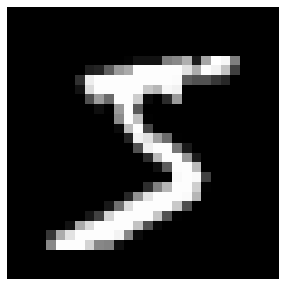

In [2]:
import matplotlib.pyplot as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [3]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [4]:
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


2-2 Sequential API로 모델 생성 및 학습

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),

    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.2148 - accuracy: 0.9378 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0768 - accuracy: 0.9772 - val_loss: 0.0613 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0564 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.0528 - val_accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0422 - accuracy: 0.9873 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0519 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.0518 -

In [8]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0620 - accuracy: 0.9819


[0.06196427717804909, 0.9818999767303467]

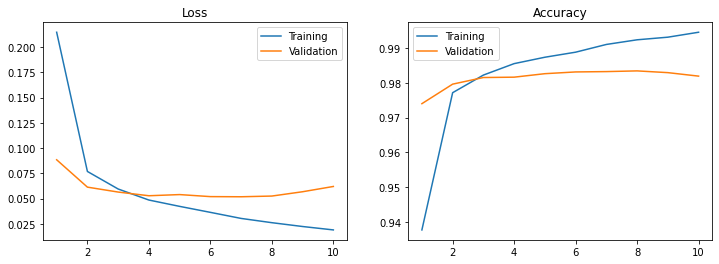

In [9]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

2-3 모델 구조 파악

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [12]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [13]:
model.layers

In [14]:
model.layers[0]

In [15]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [17]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.1374282e-01, -4.1406298e-01, -8.3018869e-01,
           -4.0818527e-01, -6.4771825e-01,  1.8589880e-01,
            2.5464451e-01,  4.3967122e-01,  2.0141387e-01,
           -6.4463300e-01, -4.4801244e-01,  1.2630041e-01,
            3.0377510e-01, -1.1287893e+00, -7.9313874e-02,
            4.3468315e-02, -7.3957223e-01,  3.0721185e-01,
            8.0179714e-02, -5.2193332e-01,  2.8187385e-01,
           -5.0775552e-01, -5.9911132e-01,  1.6641109e-01,
           -7.6569423e-02,  2.1428625e-01, -8.7118590e-01,
            9.8507844e-02,  3.1076813e-01, -8.0992204e-01,
           -2.6541520e-02,  3.2397166e-01]],
 
         [[ 3.3673921e-01,  3.8830662e-01, -6.6234934e-01,
            3.2004684e-01, -1.4385012e+00, -4.9877694e-01,
           -2.7762845e-01,  5.9175098e-01,  2.4482864e-01,
           -3.0771849e-01, -1.9157831e-01,  5.8703035e-01,
            2.1207628e-01, -1.8435057e-01, -3.7673178e-

In [18]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.1374282e-01, -4.1406298e-01, -8.3018869e-01,
          -4.0818527e-01, -6.4771825e-01,  1.8589880e-01,
           2.5464451e-01,  4.3967122e-01,  2.0141387e-01,
          -6.4463300e-01, -4.4801244e-01,  1.2630041e-01,
           3.0377510e-01, -1.1287893e+00, -7.9313874e-02,
           4.3468315e-02, -7.3957223e-01,  3.0721185e-01,
           8.0179714e-02, -5.2193332e-01,  2.8187385e-01,
          -5.0775552e-01, -5.9911132e-01,  1.6641109e-01,
          -7.6569423e-02,  2.1428625e-01, -8.7118590e-01,
           9.8507844e-02,  3.1076813e-01, -8.0992204e-01,
          -2.6541520e-02,  3.2397166e-01]],

        [[ 3.3673921e-01,  3.8830662e-01, -6.6234934e-01,
           3.2004684e-01, -1.4385012e+00, -4.9877694e-01,
          -2.7762845e-01,  5.9175098e-01,  2.4482864e-01,
          -3.0771849e-01, -1.9157831e-01,  5.8703035e-01,
           2.1207628e-01, -1.8435057e-01, -3.7673178e-01,
          -4.6

In [19]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.39239982,  0.19581436, -0.0485325 , -0.23071542,  0.1129806 ,
       -0.12475596, -0.29833987, -0.01901663, -0.09173436, -0.22677231,
       -0.13302895, -0.0385827 , -0.35387245, -0.02568546, -0.15689734,
       -0.10742035, -0.04696716, -0.20546158, -0.1095246 , -0.00045706,
       -0.24657713, -0.04887029, -0.03413608, -0.10404606, -0.03888576,
       -0.2799807 , -0.3269977 , -0.32024044, -0.03926255,  0.01356079,
       -0.06193736, -0.4017139 ], dtype=float32)>

In [20]:
model.get_layer('conv')

In [21]:
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

2

In [22]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

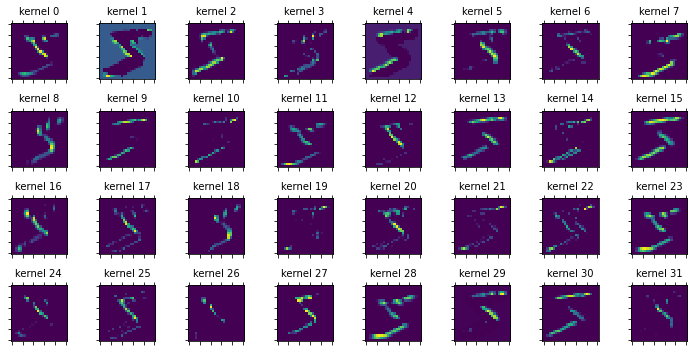

In [23]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [24]:
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


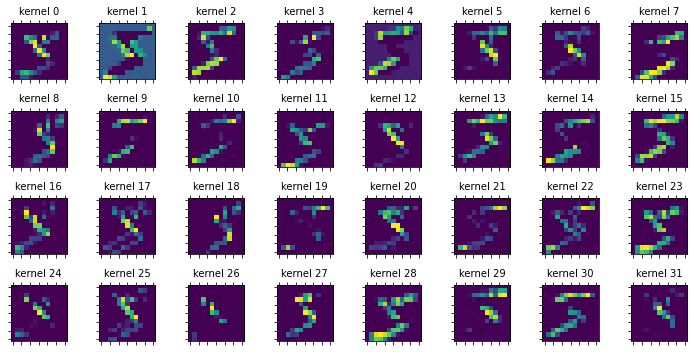

In [25]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## **03. 복잡한 모델 생성**
3-1. 데이터셋 준비

In [26]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [28]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [29]:
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [30]:
x_train = x_train/255.0
x_valid = x_valid/255.0

x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


3-2 Functional API로 다중 입력, 다중 출력 레이어 생성

In [31]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1948 - accuracy: 0.9443 - val_loss: 0.0798 - val_accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 0.0650 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0575 - accuracy: 0.9826 - val_loss: 0.0656 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0557 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0564 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0598 -

3-3. 다중 출력 분류 모델

In [34]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [35]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


In [39]:
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, 
              metrics=['accuracy'])

history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.1305 - digit_dense_loss: 0.0046 - odd_dense_loss: 0.2517 - digit_dense_accuracy: 0.9987 - odd_dense_accuracy: 0.9018 - val_loss: 0.2180 - val_digit_dense_loss: 0.0882 - val_odd_dense_loss: 0.2596 - val_digit_dense_accuracy: 0.9820 - val_odd_dense_accuracy: 0.9025
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1289 - digit_dense_loss: 0.0031 - odd_dense_loss: 0.2516 - digit_dense_accuracy: 0.9992 - odd_dense_accuracy: 0.9027 - val_loss: 0.2093 - val_digit_dense_loss: 0.0807 - val_odd_dense_loss: 0.2572 - val_digit_dense_accuracy: 0.9841 - val_odd_dense_accuracy: 0.9013
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1285 - digit_dense_loss: 0.0027 - odd_dense_loss: 0.2516 - digit_dense_accuracy: 0.9993 - odd_dense_accuracy: 0.9032 - val_loss: 0.2180 - val_digit_dense_loss: 0.0901 - val_odd_dense_loss: 0.2558 - val_digit_dense_accuracy: 0.9828 -

In [40]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 3s 8ms/step - loss: 0.2478 - digit_dense_loss: 0.1060 - odd_dense_loss: 0.2836 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.2026


[0.24777363240718842,
 0.10595402866601944,
 0.2836393415927887,
 0.9825000166893005,
 0.20260000228881836]

3-3. 다중 출력 분류 모델

In [41]:
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.2349 - digit_dense_loss: 0.1060 - odd_dense_loss: 0.2578 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.9019


[0.234872967004776,
 0.10595402866601944,
 0.2578379213809967,
 0.9825000166893005,
 0.9018999934196472]

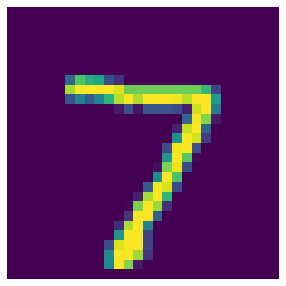

In [42]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [43]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[9.0161059e-23 2.5083523e-19 2.5497140e-16 1.6906504e-09 2.1829458e-20
 2.5754436e-23 0.0000000e+00 1.0000000e+00 2.6649035e-14 3.2750110e-15]
[0.9996953]


In [44]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [45]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

3-4. 전이학습

In [46]:
base_model_output = model.get_layer('flatten_layer').output

base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [48]:
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [49]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1203 - accuracy: 0.9653 - val_loss: 0.0673 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0536 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0501 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0489 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0499 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0590 -

In [50]:
# Freeze Model: 베이스 모델의 가중치를 고정

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [51]:
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [52]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1094 - accuracy: 0.9707 - val_loss: 0.0566 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0566 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0535 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0623 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0561 - val_ac

In [53]:
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [54]:
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [55]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1085 - accuracy: 0.9704 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0453 - accuracy: 0.9866 - val_loss: 0.0505 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0494 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0575 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.0531 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0654 - val_ac